# Определение перспективного тарифа для телеком компании

## 1. Описание проекта 

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

***Описание тарифов***

Тариф «Смарт»

* Ежемесячная плата: 550 рублей

* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей



## 2. Изучение общей информации о данных 

Для дальнейшей работы с данным мы будем использовать библиотеку Pandas

In [1]:
import pandas as pd

Путь к файлам:
* /datasets/calls.csv
* /datasets/internet.csv
* /datasets/messages.csv
* /datasets/tariffs.csv
* /datasets/users.csv

In [2]:
df_calls = pd.read_csv('../datasets/calls.csv')
df_internet = pd.read_csv('../datasets/internet.csv')
df_messages = pd.read_csv('../datasets/messages.csv')
df_tariffs = pd.read_csv('../datasets/tariffs.csv')
df_users = pd.read_csv('../datasets/users.csv')

Посмотрим на таблицы и имеющиеся значения. 

df_calls      |   
------------- | 
id — уникальный номер звонка  | 
call_date — дата звонка  |
duration — длительность звонка в минутах |
user_id — идентификатор пользователя, сделавшего звонок | 

In [3]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В данной таблице хранится информация о звонках, совершёнными клиентами.

df_users      |   
------------- | 
user_id — уникальный идентификатор пользователя |
first_name — имя пользователя |
last_name — фамилия пользователя |
age — возраст пользователя (годы) |
reg_date — дата подключения тарифа (день, месяц, год) |
churn_date — дата прекращения пользования тарифом  | 
city — город проживания пользователя | 
tariff — название тарифного плана 

In [4]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В таблице указана информация о общая информация о пользователях.

df_messages   |   
------------- | 
d — уникальный номер сообщения | 
message_date — дата сообщения | 
user_id — идентификатор пользователя, отправившего сообщение |

In [5]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В таблице указаны даты отправленных сообщений с привязкой к уникальному ID и пользователям.

df__tariffs   |   
------------- | 
tariff_name — название тарифа | 
rub_monthly_fee — ежемесячная абонентская плата в рублях | 
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату | 
messages_included — количество сообщений в месяц, включённых в абонентскую плату | 
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) | 
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) | 
rub_per_message — стоимость отправки сообщения сверх тарифного пакета | 
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) | 

In [6]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице хранится информация по используемым тарифам.

### Вывод 

Нам даны 5 таблиц, в которых указана информация о пользователях, их затратах и тарифах, которыми они пользуются. 
Данная информация нам потребуется для подтверждения / опровержения гипотез.

## 3. Подготовка данных

Для подготовки данных будем придерживаться следующего плана:

  * Проверить пропуски данных
  * Приведение к единым данных
  * Проверка на дубликаты
  
### Проверка пропусков данных

Для удобство анализа и дальнейшего преобразования сохраним наименования наших таблиц в массив *df*

In [7]:
df = [df_calls, df_internet, df_messages, df_tariffs, df_users]

In [8]:
for dataframe in df:
    print(f"{dataframe.isna().sum()}\n")

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64



По таблицам, пропуски наблюдаются только в *df_users* и только в столбце *churn_date*. Пропуск означает, что тариф ещё действовал на момент выгрузки данных.

Произведём замену пропусков на 1900-01-01, которую в последствии приведём к типу "Дата". Эта дата позволит нам в последствии беспроблемно отделить действующих клиентов от ушедших.


In [9]:
df_users = df_users.fillna("1900-01-01")
df_users.isna().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

### Приведение к единым типам данных

Для понимания, какие типы данных используются в таблицах используем метод *.info()* для каждой таблицы и проведём изменение типов данных.

In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Видно, что в таблице *id* и *call_date* указаны как *Object*.

Посмотрим на примеры данных.

In [11]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В столбце *id* значения хранятся как Object по причине того, что уникальный ID звонка имеет формат (*user_id_N*), где N - номер количественное значение. Мы можем оставить эти значения не внося изменений в логику присвоения уникальных номеров. 

В стобце *call_data* значения хранятся объектами. Переведём их к типу *Дата*. 

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

*Duration* определён как *float64*, что обусловлено указанием минут. 

In [13]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Дата также указана, как объект. Приведём дату сессии к типу "Дата" 

In [14]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

Остальные параметры определены корректно. 

In [15]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Действуем похожим образом - приводим дату сообщения к единому формату. 

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [17]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице с тарифами вносить коррективы не требуется.

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  500 non-null    object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1900-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1900-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1900-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1900-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1900-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,1900-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,1900-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,1900-01-01,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,1900-01-01,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,1900-01-01,Пермь,Василиса,Блинова,2018-03-22,smart


В данном столбце нам потребуется внести коррективы в два столбца - *churn_date* + *reg_date*. Так как мы ранее внесли коррективы в столбец *churn_date* и заменили пропуски на нулевую дату, то мы можем произвести перевод к типу "Дата". При дальнейшем анализе мы сможем отсортировать таких пользователей при помощи фильтра *!= 0000-00-00*. 

In [20]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

#### Вывод

При изменении типов данных основной вопрос возникал к датам, который были сохранены "объектами". Провели конвертацию их к типу "Дата" 

### Проверка на дубликаты

Наименования таблиц сохранены в переменной *df*. Используем цикл для обнаружения количества дубликатов по таблицам. 

In [21]:
for dataframe in df:
    print(dataframe.duplicated().sum())

0
0
0
0
0


#### Вывод

Дубликатов в таблицах нет. 

### Исправление некорректных данных

Начнём анализ значений для каждой таблицы для поиска некорректных значений, которые смогут повлиять на последующую проверку гипотез. 

Анализ будем производить по очереди для каждой таблицы. 

In [22]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице имеются с длительностью звонков наблюдаются записи с нулевым значением. Посмотрим, сколько таких записей. 

In [23]:
df_calls.loc[df_calls['duration'] == 0.0, ['duration']].count()

duration    39613
dtype: int64

Получается, что из 202 тысяч записей почти 40 тысяч (~ 20 %) с нулевым значением, чего не может быть. Такое количество некорректных значений влияет на среднее значение по таблице. 

Произведём замену нулевых значений на медианное (6 минут). 

In [24]:
df_calls.loc[df_calls['duration'] == 0.0, ['duration']] = df_calls['duration'].median()

In [25]:
df_calls['duration'].describe()

count    202607.000000
mean          7.928986
std           4.894553
min           0.010000
25%           5.040000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

После правок мы можем увидеть, что среднее значение увеличилось более чем на 1 минуту. 

В это время минимальное значение стало 0.01. Это больше похоже на правду, так как некоторые из клиентов могут звонить и сразу сбрасывать. Это служит неким "знаком" с просьбой перезвонить. Также, такие значения могут быть обусловлены "прозвонами", для определения действующих номеров. 



In [26]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Значения в данной таблице выглядят правдободобно. Нулевое значение в потреблении трафика вполне возможно, если человек не использует интернет вовсе.

In [27]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице с сообщениями мы можем проверить только значение дат - не выходят ли они за разумные границы. 

In [28]:
df_messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Данные собраны за один год (со 2 января по 31 декабря). Каких-либо некорректных значений не замечено. 

In [29]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1900-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1900-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1900-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1900-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1900-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [31]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице с пользователями также не наблюдаются некорректные значения. Возрастные показатели не выходят за правила (оформление SIM-карт с 18 лет). 

#### Вывод

По таблицам не были выявлены множественные некорректные данные, однако в таблице *df_calls* были обнаружены звонки с нулевой длительностью, что является некорректным значением даже при сбросе звонка. Для исключения влияния на последующие гипотезы было принято решение с заменой их на медиану по столбцу. 

## 4.Расчёт значений для каждого пользователя 

В данном пункте мы проведём расчёт следующих значений:

* Кол-во звонков и минут по месяцам;
* Кол-во отправленных сообщений по месяцам;
* Объем израсходованного интернет-трафика по месяцам;
* Помесячную выручку с каждого пользователя 
    
Для расчета последнего значения нам потребуется вычесть бесплатный лимит из суммарного кол-ва звонков / сообщений / интернет-трафика. Остаток умножим на значение из тарифного плана. 

### Количество звонков и минут по месяцам

Для рассчёта значений используем сводную таблицу со следующими параметрами:
* index = 'user_id' - наша задача посчитать для каждого пользователя значения
* columns = df_calls['call_date'].dt.month - у нас в таблице явно не указаны месяцы, поэтому мы возьмём их из даты сессии
* values = 'duration' - наша задача посчитать трафик
* aggfunc = ['sum','count'] - нам необходимо подсчитать суммарное количество звонков и минут, потраченных за 1 месяц. В связи с этим используем две функции - сумму и количество. 


Для наглядности, заменим пропуски на 0. Пропуски соответствуют тому, что пользователь не пользовался телефоном или не был еще подключен. 

In [32]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls_minutes_per_month = df_calls.pivot_table(index = ['user_id','month'],
                                                  values = 'duration',
                                                aggfunc = ['sum','count']).fillna(0)
df_calls_minutes_per_month.head(10)

sum    count
              duration duration
user_id month                  
1000    5       180.06       22
        6       248.90       43
        7       354.80       47
        8       449.87       52
        9       512.14       58
        10      406.45       57
        11      355.04       43
        12      360.98       46
1001    11      492.12       59
        12      487.34       63

### Кол-во отправленных сообщений по месяцам


Построим также сводную таблицу используя схожие параметры, однако для *values* будем использовать значения из стобца с уникальным ID, а как функцию - подсчёт количества таких значений (*aggfunc = 'count'*)

In [33]:
df_messages['month'] = df_messages['message_date'].dt.month
df_month_message = df_messages.pivot_table(index = ['user_id','month'],
                                            values = 'id',
                                         aggfunc = 'count').fillna(0)
df_month_message.head(10)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11

### Объем израсходованного интернет-трафика по месяцам

Для рассчёта значений используем сводную таблицу со следующими параметрами:
* index = 'user_id' - наша задача посчитать для каждого пользователя значения
* columns = df_internet['session_date'].dt.month - у нас в таблице явно не указаны месяцы, поэтому мы возьмём их из даты сессии
* values = 'mb_used' - наша задача посчитать трафик
* aggfunc = 'sum' - нам необходимо подсчитать суммарный трафик, поэтому просуммируем значения


In [34]:
df_internet['month'] = df_internet['session_date'].dt.month
df_month_mb = df_internet.pivot_table (index = ['user_id','month'],
                                       values = 'mb_used',
                                       aggfunc = 'sum').fillna(0)
df_month_mb.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

### Помесячная выручку с каждого пользователя 
    
Для расчета последнего значения нам потребуется вычесть бесплатный лимит из суммарного кол-ва звонков / сообщений / интернет-трафика. Остаток умножим на значение из тарифного плана.

Для упрощения работы объединим необходимые сводные таблицы в одну и определим тарифы пользователей. Это нам понадобится для дальнейшего расчёта выручки.

Для расчёта используем следующий алгоритм:
* Объединим таблицы с сообщениями, трафиком и звонками по индекс (user_id, month)
* К общей таблице добавим используемые пользователями тарифы и их лимиты
* Выполним вычитание из лимитов тарифа пользовательских затрат.
    * Если значение меньше нуля, то значит был перерасход и добавляем умножение на тарифное значение
    * Если значение больше или равно нулю, то пользователь не вышел за границы тарифа и он платит только абонентскую плату.
    

Создадим общую сводную таблицу, в которой будут учитываться все расходы пользователей. Для этого будем использовать метод *.merge()*  и *.join()*

In [35]:
overall_df = df_month_message.join(df_month_mb, on =['user_id','month'], how = 'outer')
overall_df = overall_df.join(df_calls_minutes_per_month['sum'], on =['user_id','month'], how = 'outer')
overall_df = overall_df.reset_index().merge(df_users[['user_id','tariff']], on = 'user_id', how = 'outer')
overall_df.columns = ['user_id', 'month', 'id', 'mb_used', 'duration', 'tariff_name']
overall_df = overall_df.merge(df_tariffs, on = 'tariff_name')

По итогу у нас получается таблица, в которой включены все необходимы параметры для расчёта выручки. 

In [36]:
overall_df.head(10)

,user_id,month,id,mb_used,duration,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,2253.49,180.06,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,60.0,23233.77,248.90,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,75.0,14003.64,354.80,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,81.0,14055.93,449.87,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,57.0,14568.91,512.14,ultra,1000,30720,3000,1950,150,1,1
5,1000,10.0,73.0,14702.49,406.45,ultra,1000,30720,3000,1950,150,1,1
6,1000,11.0,58.0,14756.47,355.04,ultra,1000,30720,3000,1950,150,1,1
7,1000,12.0,70.0,9817.61,360.98,ultra,1000,30720,3000,1950,150,1,1
8,1003,8.0,37.0,8565.21,427.67,ultra,1000,30720,3000,1950,150,1,1
9,1003,9.0,91.0,12468.87,1078.89,ultra,1000,30720,3000,1950,150,1,1


Далее, мы вычтем из тарифного плана затраты пользователей. Если показатели >= 0 → пользователь не вышел за границы тарифа. 

In [38]:
res_df = overall_df.copy().fillna(0)
res_df['mb_used'] = res_df['mb_per_month_included'] - res_df['mb_used']
res_df['id'] = res_df['messages_included'] - res_df['id']
res_df['duration'] = res_df['minutes_included'] - res_df['duration']

In [39]:
res_df.loc[res_df['mb_used']>0, 'mb_used'] = 0
res_df.loc[res_df['mb_used']<0, 'mb_used'] = abs(res_df['mb_used'] / 1024 * res_df['rub_per_gb'])

In [40]:
res_df.loc[res_df['id']>0,'id'] = 0
res_df.loc[res_df['id']<0,'id'] =  abs(res_df['id'] * res_df['rub_per_message'])

In [41]:
res_df.loc[res_df['duration']>0,'duration'] = 0
res_df.loc[res_df['duration']<0,'duration'] = abs(res_df['duration'] * res_df['rub_per_minute'])

Создадим столбец *total_val*, в котором сохраним сумму выручек по отдельным параметрам + абонентская плата (в соответствии с тарифом)

In [42]:
res_df['total_val'] = res_df['duration'] + res_df['id'] + res_df['mb_used'] + res_df['rub_monthly_fee']

Для наглядности, приведём итоговую сумму и месяц в целочисленному формату. 

In [43]:
res_df[['total_val','month']] = res_df[['total_val','month']].fillna(0).apply(lambda x: x.astype(int))

Создадим итоговую сводную таблицу, в которой индексами является *user_id*, в колонках указаны месяца, а значения - *total_val*(выручка)

In [44]:
res_df.pivot_table(index = 'user_id',
                   columns = 'month',
                  values = 'total_val').fillna(0)

month,0,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1149.0,550.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,550.0,983.0,1518.0,809.0,550.0,1180.0,1087.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0
1004,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2293.0,1950.0,3153.0,1950.0
1496,0.0,550.0,3514.0,2706.0,1919.0,2294.0,1876.0,2638.0,2607.0,2862.0,3122.0,3096.0,1824.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,727.0,550.0,1720.0


Нулевые значения означают, что пользователь не пользовался услугами оператора.

## 5. Анализ данных

### Сколько минут / сообщений / гигабайт требуется пользователям каждого тарифа в месяц

Для нахождения суммарного кол-ва затраченных сообщений / минут /интернет-трафика создадим сводную таблицу, в которой индексами будут месяца, а колонки представляют разделение по тарифам и показателям. Как функцию, используем сумму. 

In [45]:
sum_df = overall_df.pivot_table(index = 'month',
                      columns = 'tariff_name',
                      values = ['duration', 'id','mb_used'],
                      aggfunc = 'sum')
sum_df

duration                 id             mb_used            
tariff_name      smart     ultra    smart   ultra       smart       ultra
month                                                                    
1.0            7745.44   4333.00    620.0   304.0   289466.40   118266.13
2.0           19063.88   7819.70   1397.0   527.0   672629.15   282622.50
3.0           33168.54  20089.31   2453.0  1195.0  1163020.25   648815.36
4.0           45406.93  27731.99   3443.0  1736.0  1507764.23   925547.39
5.0           60837.28  38119.49   4762.0  2536.0  2228530.99  1297331.25
6.0           72087.50  44460.21   5478.0  3505.0  2590322.27  1589694.90
7.0           90673.21  54808.02   6784.0  4536.0  3164373.22  1865105.53
8.0          110034.57  60423.06   7905.0  5183.0  3903519.22  2094637.85
9.0          123067.00  68346.16   8746.0  6013.0  4238930.49  2208491.87
10.0         139718.40  75683.98   9927.0  7187.0  4926594.13  2465576.49
11.0         153169.29  80058.94  10768.0  7476.0  5339040.14  2651432.87
12.0         178219.80  91402.34  12130.0  8425.0  6104304.11  3029250.99

По данной таблице сложно определить какие-либо зависимости. Построим графики по каждому и сравним показатели по тарифам.

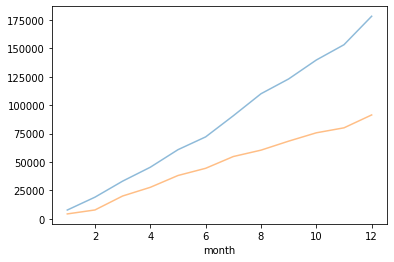

In [46]:
sum_df['duration']['smart'].plot(alpha = 0.5)
sum_df['duration']['ultra'].plot(alpha = 0.5)

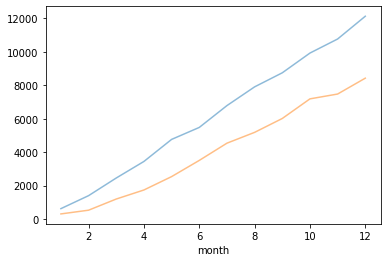

In [47]:
sum_df['id']['smart'].plot(alpha = 0.5)
sum_df['id']['ultra'].plot(alpha = 0.5)

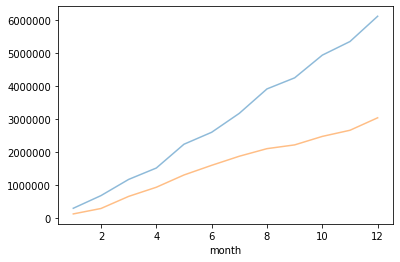

In [48]:
sum_df['mb_used']['smart'].plot(alpha = 0.5)
sum_df['mb_used']['ultra'].plot(alpha = 0.5)

Исходя из графиков выше видно, что суммарное кол-во затраченных минут / сообщений / мегабайт в месяц у тарифа "Смарт" выше.
Это обусловлено тем, что пользовталей тарифа больше. Однако, если мы посмотрим на средние значения, то картина другая. 

In [49]:
analys_df = overall_df.pivot_table(index = 'month',
                      columns = 'tariff_name',
                      values = ['duration', 'id','mb_used'],
                      aggfunc = 'mean')
analys_df

duration                     id                  mb_used  \
tariff_name       smart       ultra      smart      ultra         smart   
month                                                                     
1.0          227.807059  481.444444  20.000000  43.428571   8513.717647   
2.0          328.687586  325.820833  27.940000  32.937500  11597.054310   
3.0          430.760260  542.954324  35.550725  47.800000  15104.159091   
4.0          405.419018  523.245094  35.864583  44.512821  13462.180625   
5.0          431.470071  595.617031  39.032787  48.769231  15805.184326   
6.0          442.254601  548.891481  38.577465  52.313433  15794.647988   
7.0          451.110498  622.818409  38.988506  62.136986  15743.150348   
8.0          470.233205  586.631650  38.750000  58.897727  16681.706068   
9.0          475.162162  615.731171  39.219731  63.294737  16303.578808   
10.0         476.854608  641.389661  39.082677  69.776699  16757.122891   
11.0         486.251714  620.611938  39.881481  66.159292  16895.696646   
12.0         530.416071  682.107015  42.264808  72.008547  18113.662047   

                           
tariff_name         ultra  
month                      
1.0          13140.681111  
2.0          12846.477273  
3.0          17535.550270  
4.0          16828.134364  
5.0          19656.534091  
6.0          19152.950602  
7.0          20723.394778  
8.0          19760.734434  
9.0          19372.735702  
10.0         20209.643361  
11.0         19935.585489  
12.0         21951.094130

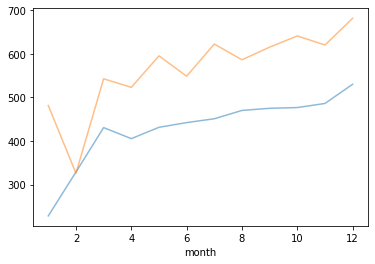

In [50]:
analys_df['duration']['smart'].plot(alpha = 0.5)
analys_df['duration']['ultra'].plot(alpha = 0.5)

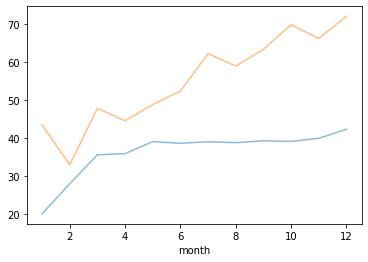

In [51]:
analys_df['id']['smart'].plot(alpha = 0.5)
analys_df['id']['ultra'].plot(alpha = 0.5)

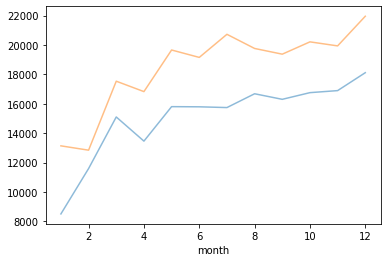

In [52]:
analys_df['mb_used']['smart'].plot(alpha = 0.5)
analys_df['mb_used']['ultra'].plot(alpha = 0.5)

Среднее количество затрачиваемого трафика у пользователей тарифа "Ультра" больше. В обоих случаях просматривается зависимость объема трафика и месяцев. Ближе к Новому Году трафик увеличивается, а в декабре наблюдается пик затрат. Одной из причин могут являться новогодние праздники. 

Определим нормальные значения для каждого параметра. Для этого построим "ящик с усами":

In [53]:
import matplotlib.pyplot as plt

(0, 36000)

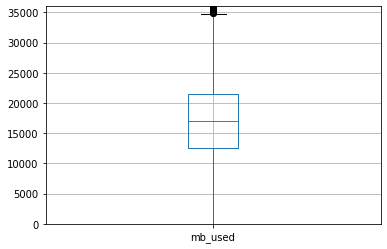

In [54]:
overall_df.boxplot('mb_used')
plt.ylim(0,36000)


Нормальные значения по интернет-трафику заключены от 0 мегабайт до ~ 35 тыс (~ 34гб)

(0, 150)

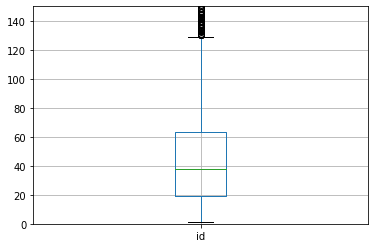

In [55]:
overall_df.boxplot('id')
plt.ylim(0,150)

Нормальные значения по сообщениям расположены от 1 до 130 сообщений. 

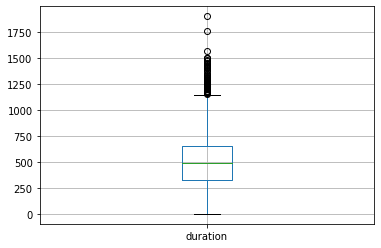

In [56]:
overall_df.boxplot('duration')

Нормальные значени по длительности звонков в промежутке от 0 до 1125 мин.

Определим среднее значение, дисперсию и стандартное отклонение. 

Для определения дисперсии используем функцию *np.var(x)* из библиотеки *Numpy*.

In [57]:
import numpy as np

print("Дисперсия сообщений {}".format(np.var(overall_df['id'])))
print("Дисперсия длительности звонков = {}".format(np.var(overall_df['duration'])))
print("Дисперсия интернет-трафика = {}".format(np.var(overall_df['mb_used'])))


Дисперсия сообщений 1228.1458278273099
Дисперсия длительности звонков = 68154.73582794938
Дисперсия интернет-трафика = 56477982.73768083


Определим стандартное отклонение. Для этого используем функцию *np.std(x)*

In [58]:
print("Стандартное отклонение сообщений  = {}".format(np.std(overall_df['id'])))
print("Стандартное отклонение длительности звонков = {}".format(np.std(overall_df['duration'])))
print("Стандартное отклонение интернет-трафика = {}".format(np.std(overall_df['mb_used'])))

Стандартное отклонение сообщений  = 35.044911582529494
Стандартное отклонение длительности звонков = 261.06462002337537
Стандартное отклонение интернет-трафика = 7515.1834799744465


In [59]:
print("Среднее значение сообщений  = {}".format(overall_df['id'].mean()))
print("Среднее значение длительности звонков  = {}".format(overall_df['duration'].mean()))
print("Среднее значение интернет-трафика  = {}".format(overall_df['mb_used'].mean()))

Среднее значение сообщений  = 45.28376886271623
Среднее значение длительности звонков  = 506.1335979836171
Среднее значение интернет-трафика  = 17266.708626287837


Построим гистограммы для отображения распределения значений. 

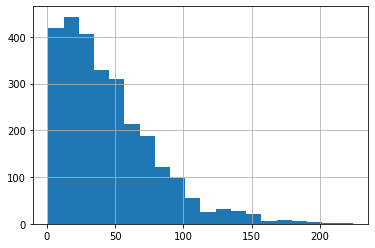

In [60]:
overall_df['id'].hist(bins = 20)

Распределение сообщений соответствует распределению Пуассона и является асимметричным. 

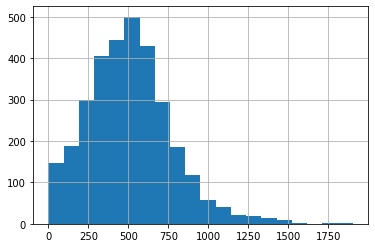

In [61]:
overall_df['duration'].hist(bins = 20)

Распределение длительности звонков имеет скошенность влево и ближе к симметричному распределению.

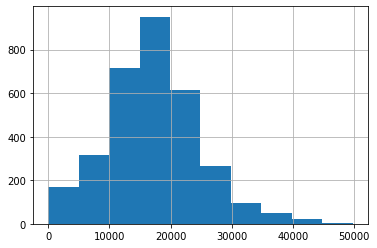

In [62]:
overall_df['mb_used'].hist(bins = 10)

## 5. Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

Для начала сформиулируем гипотезы:
* Н_0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
* Н_1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Для проверки гипотезы о равенстве средних выручек по тарфиам, применим метод *scipy.stats.ttest_ind()* и передадим два параметра:

```python
ultra = res_df.loc[res_df['tariff_name']=='ultra','total_val'].to_list()
smart = res_df.loc[res_df['tariff_name']=='smart','total_val'].to_list()
```
Пороговое значение примем в 5%.

In [63]:
ultra = res_df.loc[res_df['tariff_name']=='ultra','total_val'].to_list()
smart = res_df.loc[res_df['tariff_name']=='smart','total_val'].to_list()

In [64]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(ultra, smart)

print('P-val: ', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")

P-val:  3.495333900013029e-151
Не получилось отвергнуть альтернативную гипотезу


Подтвердилась альтернативная гипотеза - средние выручки по тарфиам различаются.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Для проверки данной гипотезы нам необходимо добавить сведения о городе проживания пользователей в общую таблицу.

In [65]:
res_df = res_df.merge(df_users[['city','user_id']], on = 'user_id')

In [66]:
moscow = res_df.query('city == "Москва"')['total_val'].to_list()
other = res_df.query('city != "Москва"')['total_val'].to_list()

Составим нулевую и альтернативную гипотезу:
* Н_0 - Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
* Н_1 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [67]:
alpha = 0.05

results = st.ttest_ind(moscow, other)

print('P-val: ', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")

P-val:  0.7095346293624412
Отвергаем альтернативную гипотезу


P-val = 0.7. Гипотеза о разных выручках пользователей Москвы и регионов не подтвердилась. Выручки ~ равны. 

## 6. Вывод

В процессе работы был произведён анализ данных сотового оператора. В процессе анализа мы сделали предобработку данных с исправлением некорректных значений и приведение к нужным типам. 
При подготовке были вычислены и добавлены следующие значения:
* Кол-во смс
* Кол-во интернет-трафика
* Кол-во минут
* Средняя выручка

Все эти значения были расчитаны для каждого месяца. По ним мы смогли увидеть прогрессию затрат тарифных лимитов в течении года. 

Основной задачей являлась проверка следующих гипотез:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Первая гипотеза была подтверждена, а вторая гипотеза - опровергнута.
